In [1]:
!pip install yfinance

In [1]:
import math
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import yfinance as yf

data = yf.download('GOOGL','2016-03-01','2021-02-26')

[*********************100%***********************]  1 of 1 completed


In [3]:
# df = pd.read_csv('GOOGL.csv')
# df.set_index('Date', inplace=True)

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-02-29,721.000000,730.599976,716.840027,717.219971,717.219971,2253400
2016-03-01,721.299988,742.330017,718.640015,742.169983,742.169983,3005600
2016-03-02,742.869995,743.119995,733.250000,739.479980,739.479980,1814600
2016-03-03,739.479980,741.000000,729.630005,731.590027,731.590027,2026700
2016-03-04,734.799988,735.000000,725.619995,730.219971,730.219971,2425800


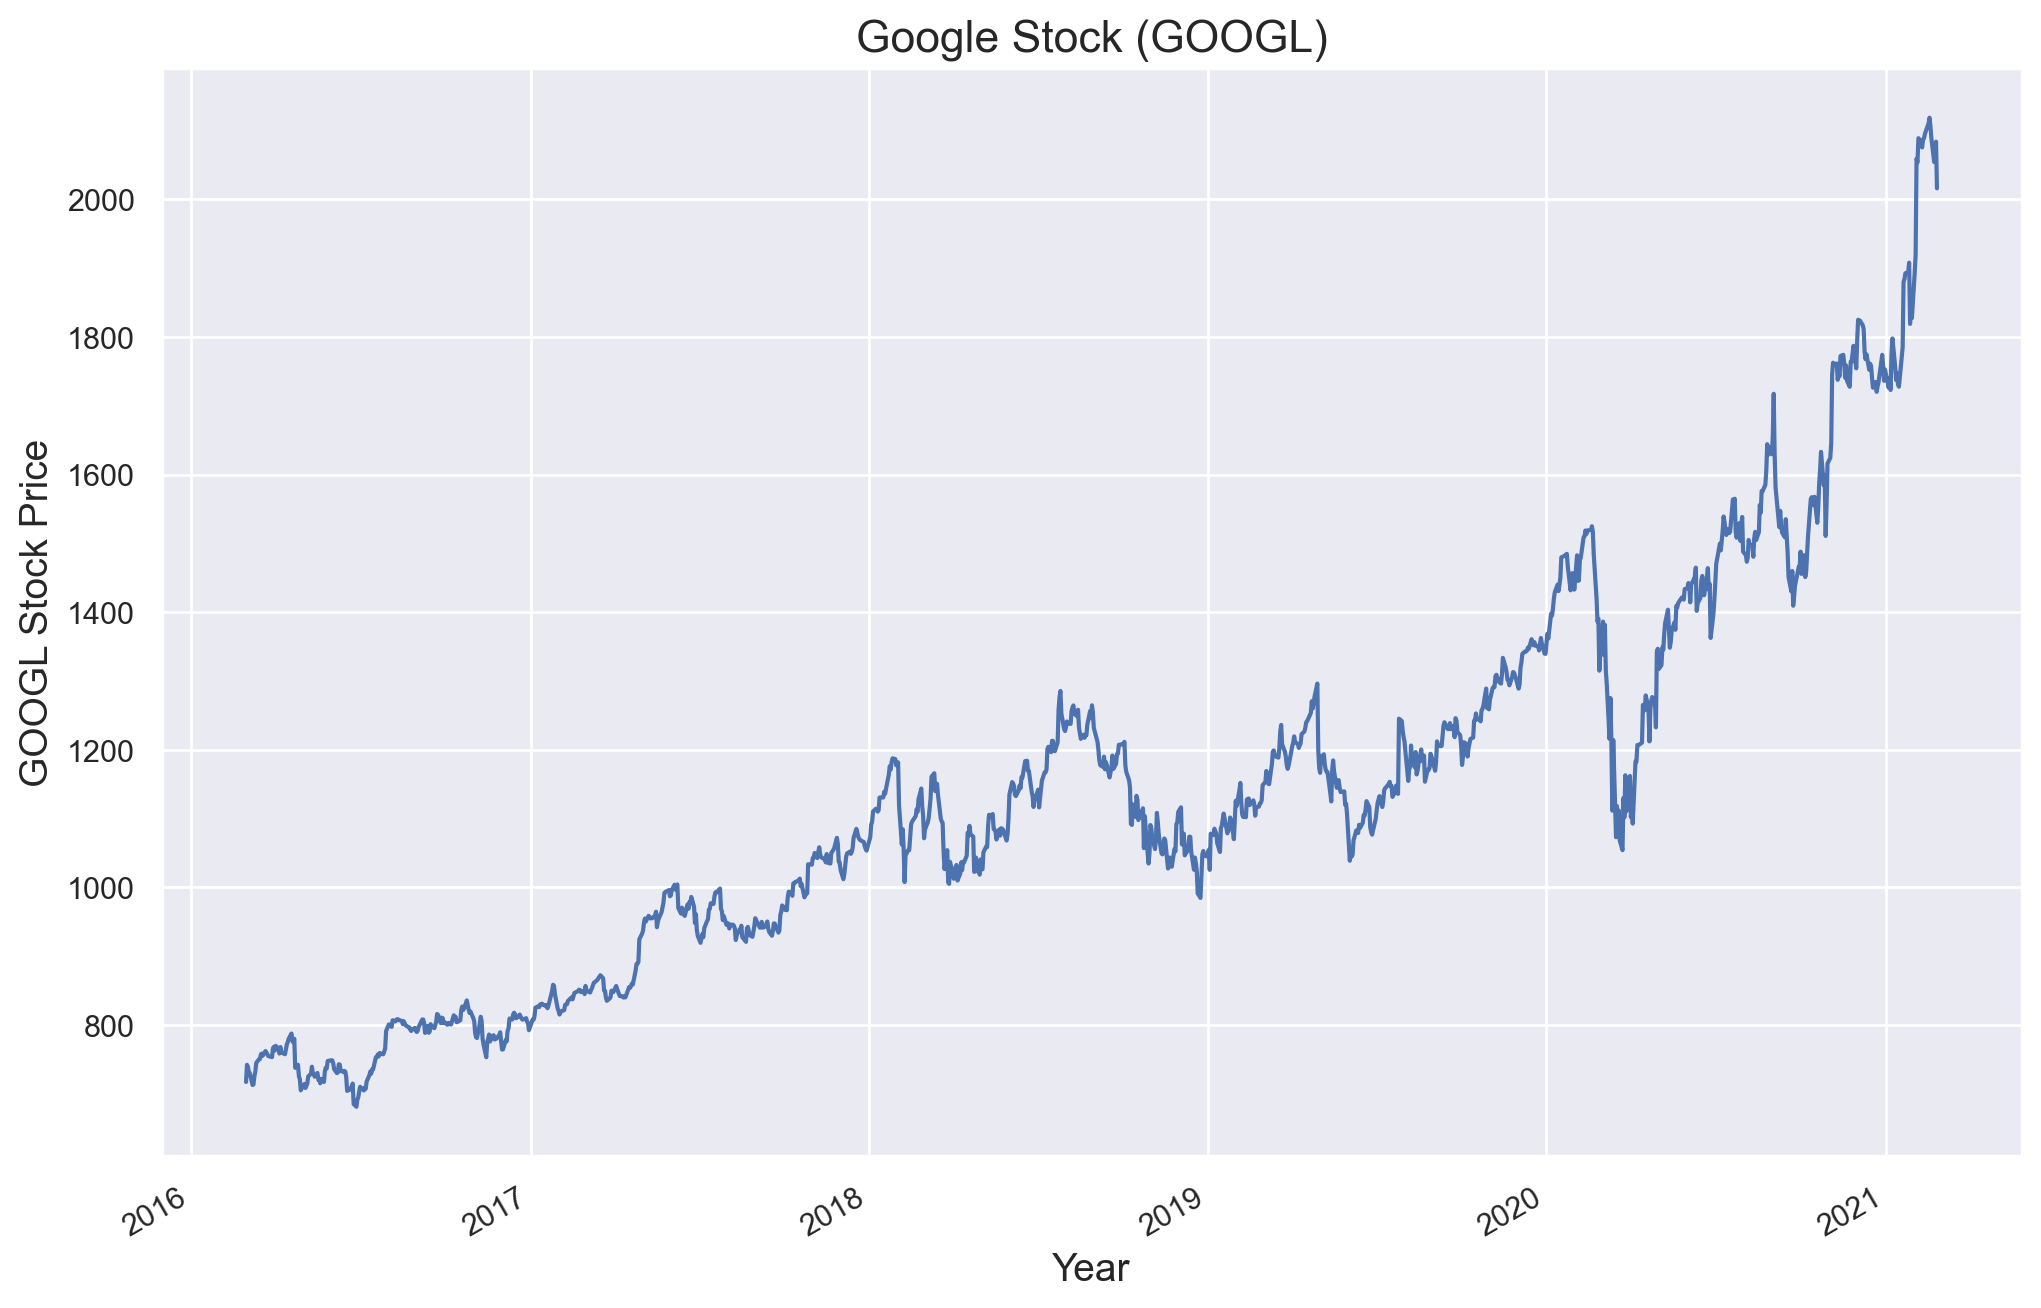

In [5]:
sns.set()
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

data['Adj Close'].plot()
plt.title("Google Stock (GOOGL)", fontsize=16)
plt.ylabel('GOOGL Stock Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

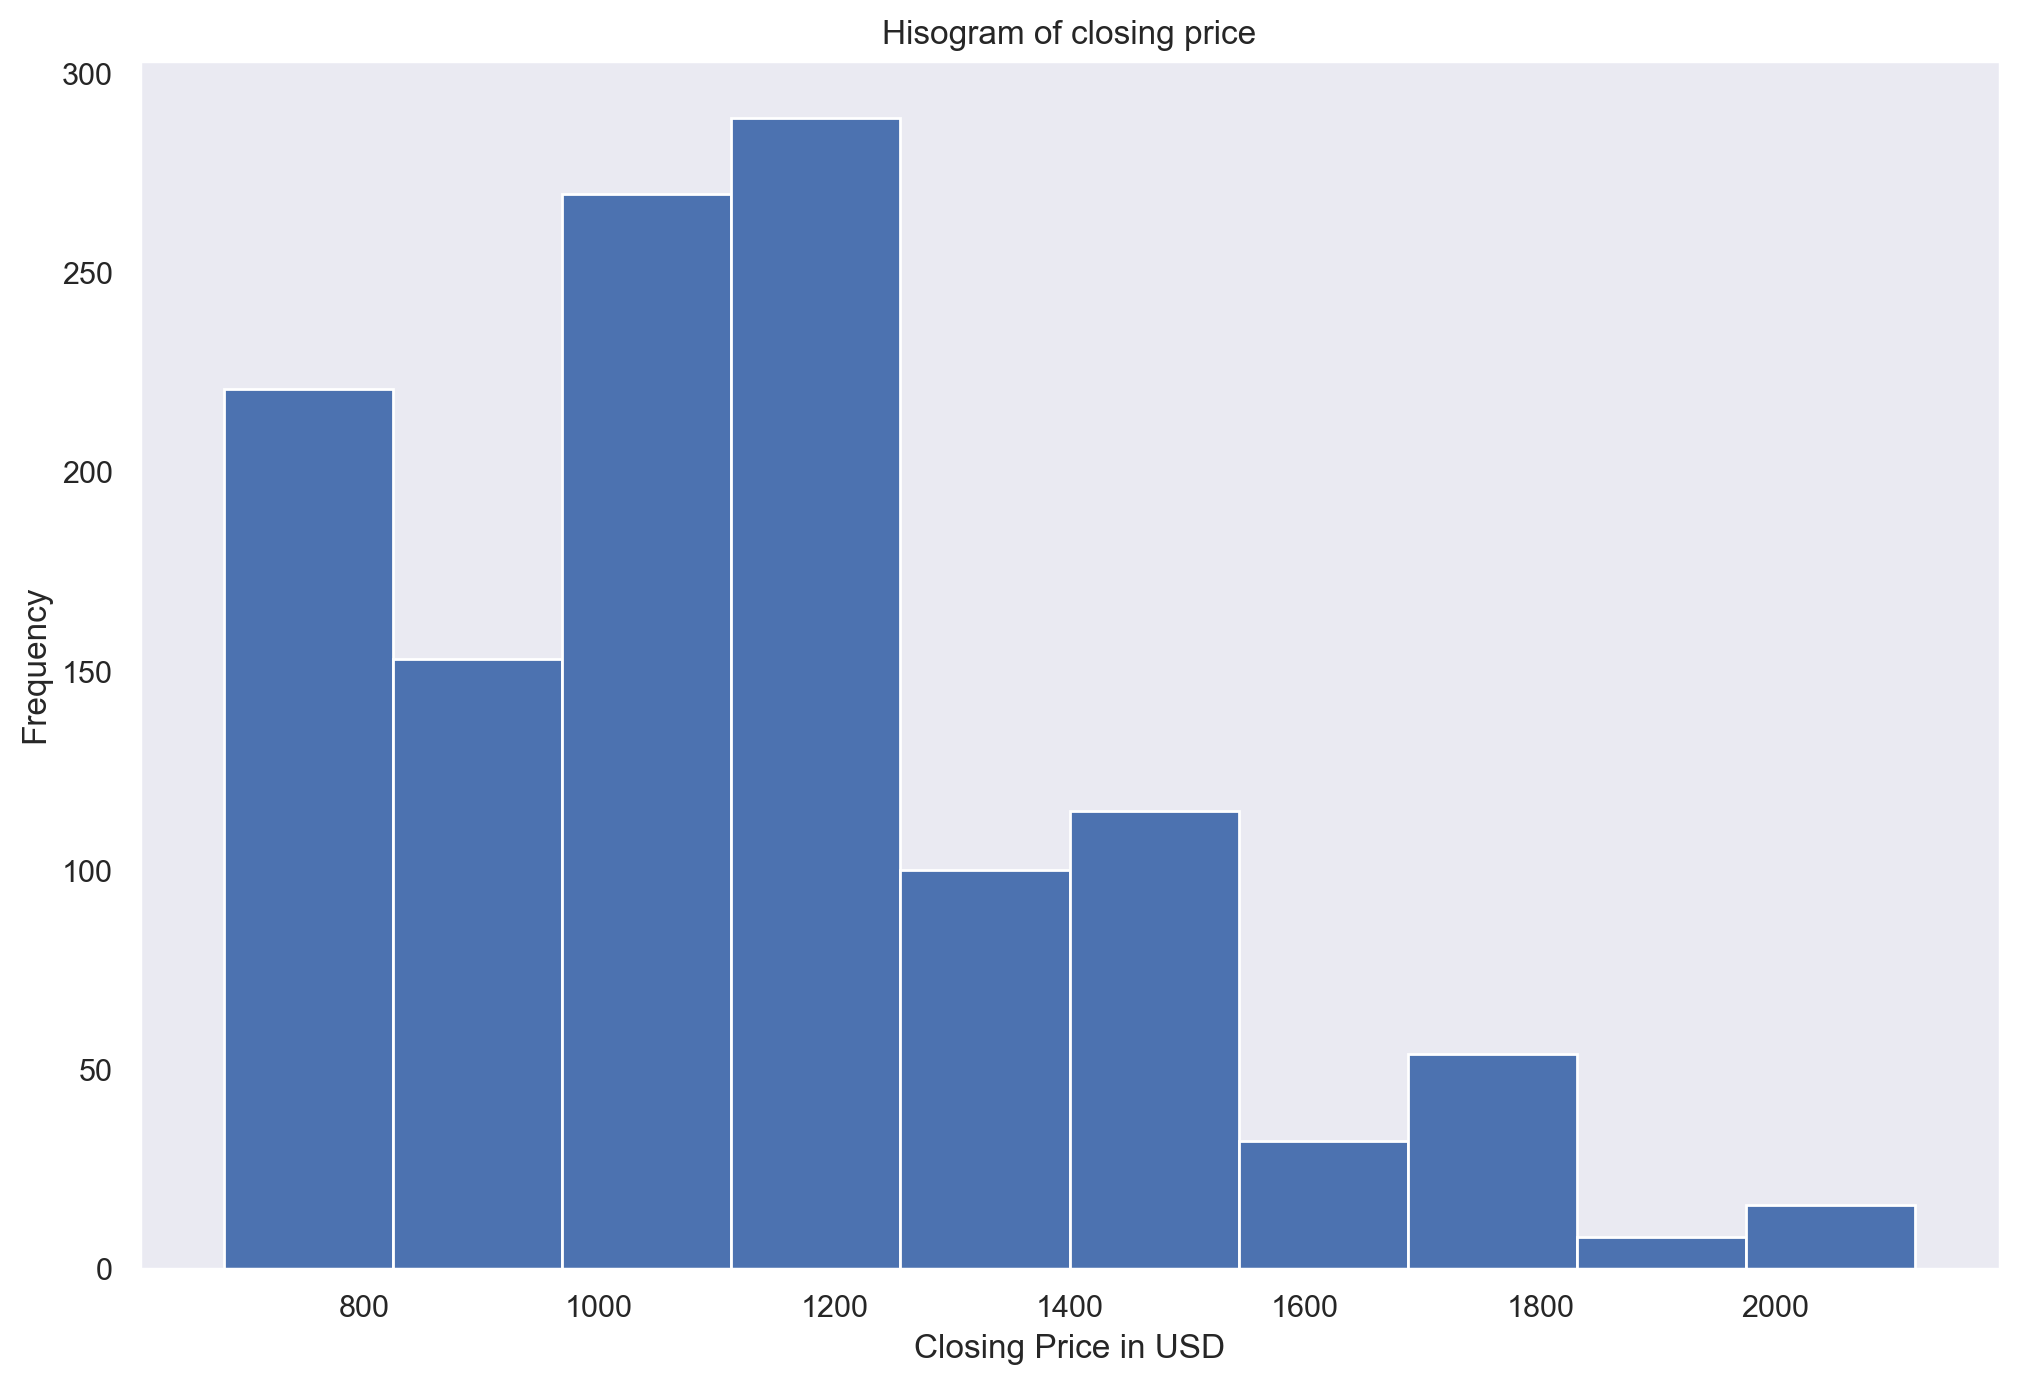

In [6]:
sns.set()
data_close = data['Close']
data_close.plot(style='k.',kind='hist',grid=False)
plt.title('Hisogram of closing price')
plt.xlabel('Closing Price in USD')
plt.show()

In [7]:
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Results of dickey fuller test
Test Statistics                   0.796684
p-value                           0.991582
No. of lags used                 23.000000
Number of observations used    1234.000000
critical value (1%)              -3.435660
critical value (5%)              -2.863885
critical value (10%)             -2.568019
dtype: float64


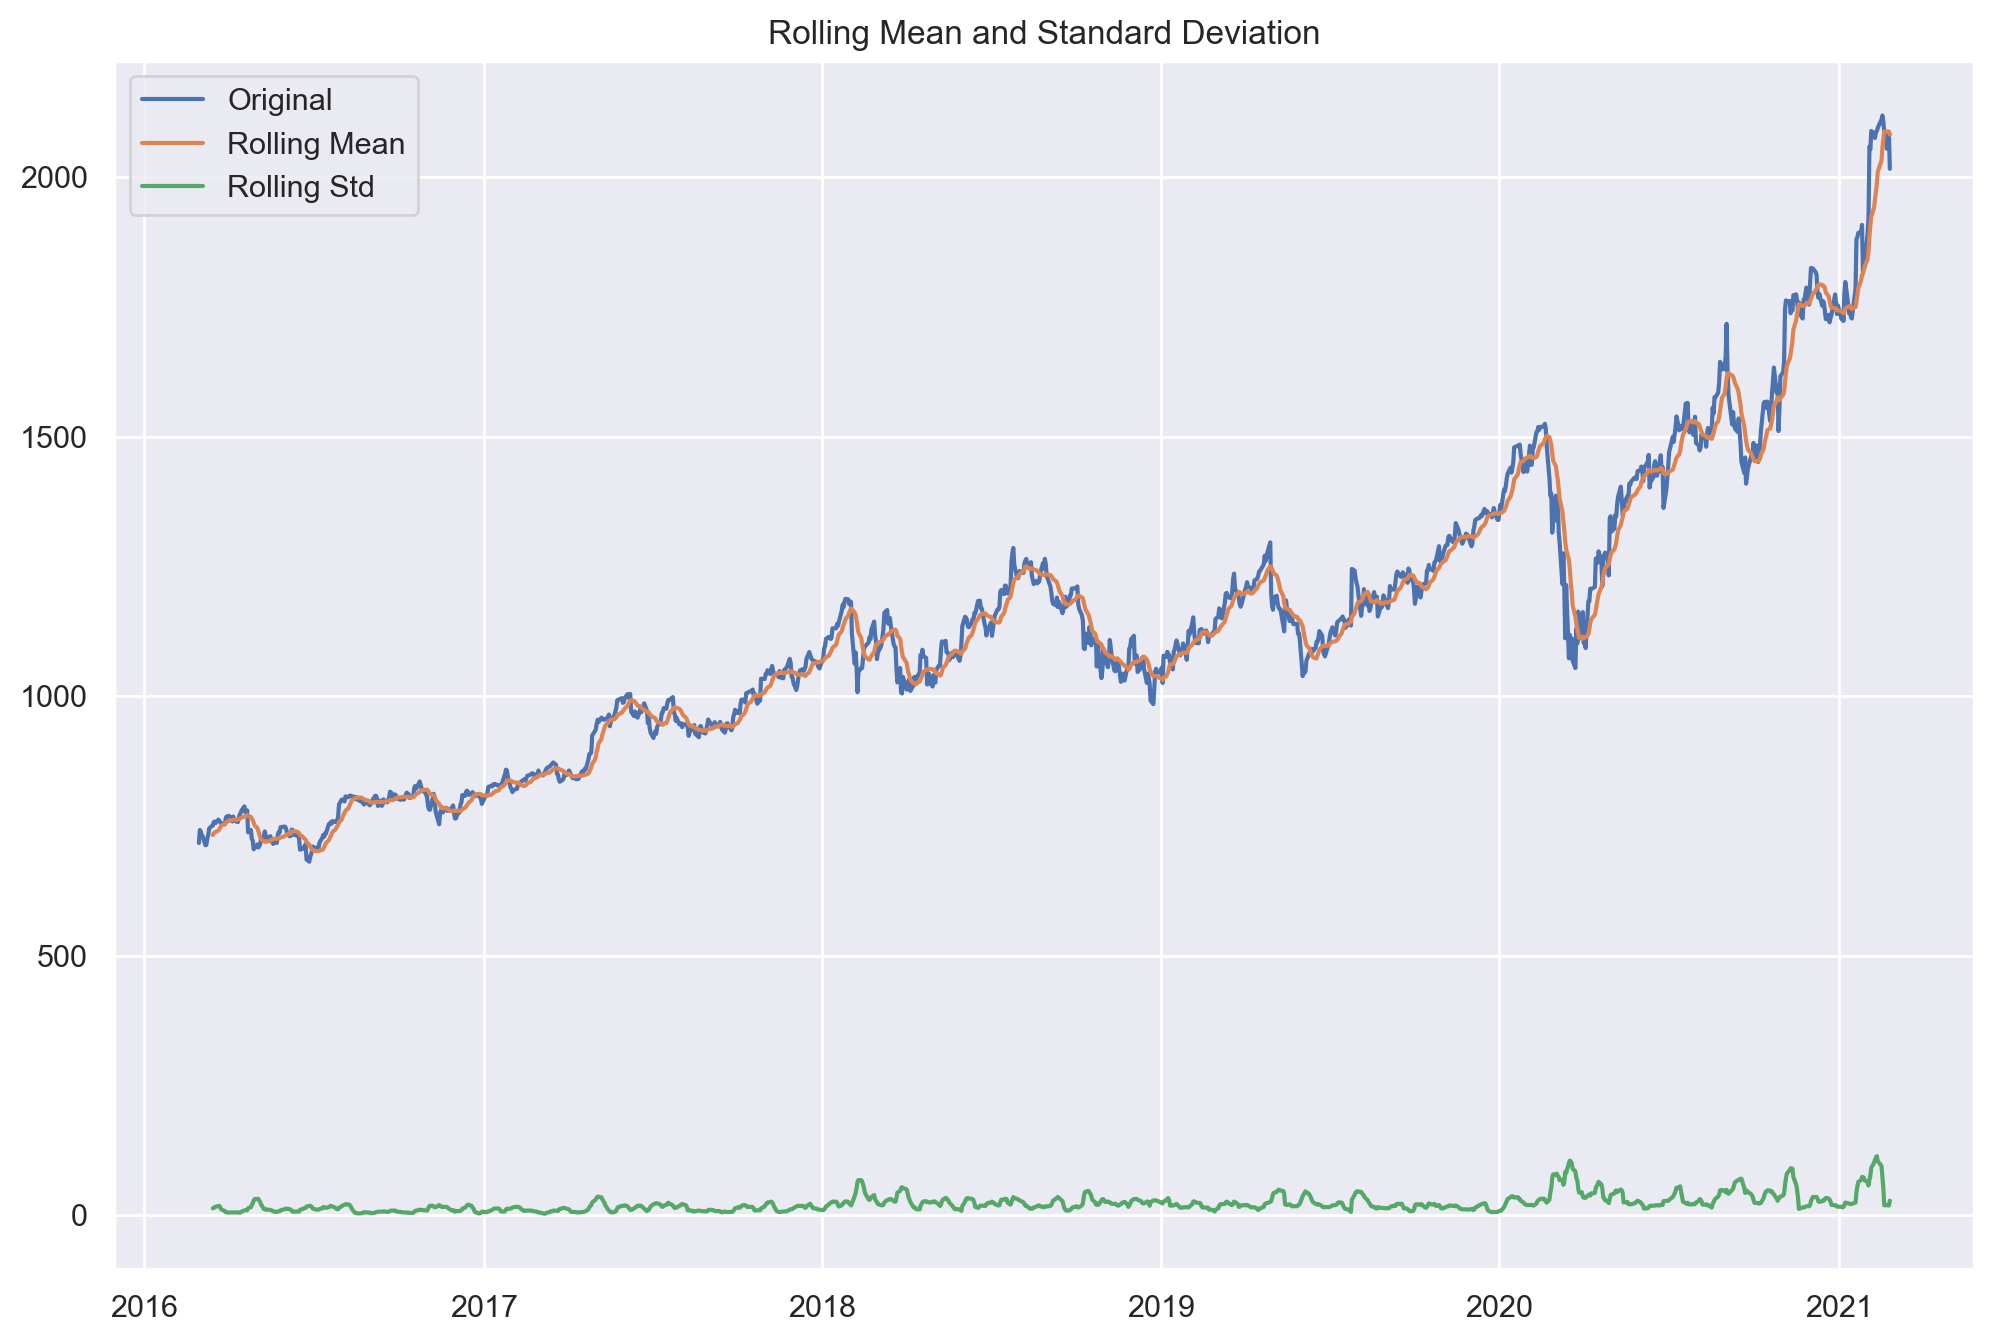

In [8]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries,label='Original')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(data['Adj Close'])

<Figure size 2400x1600 with 0 Axes>

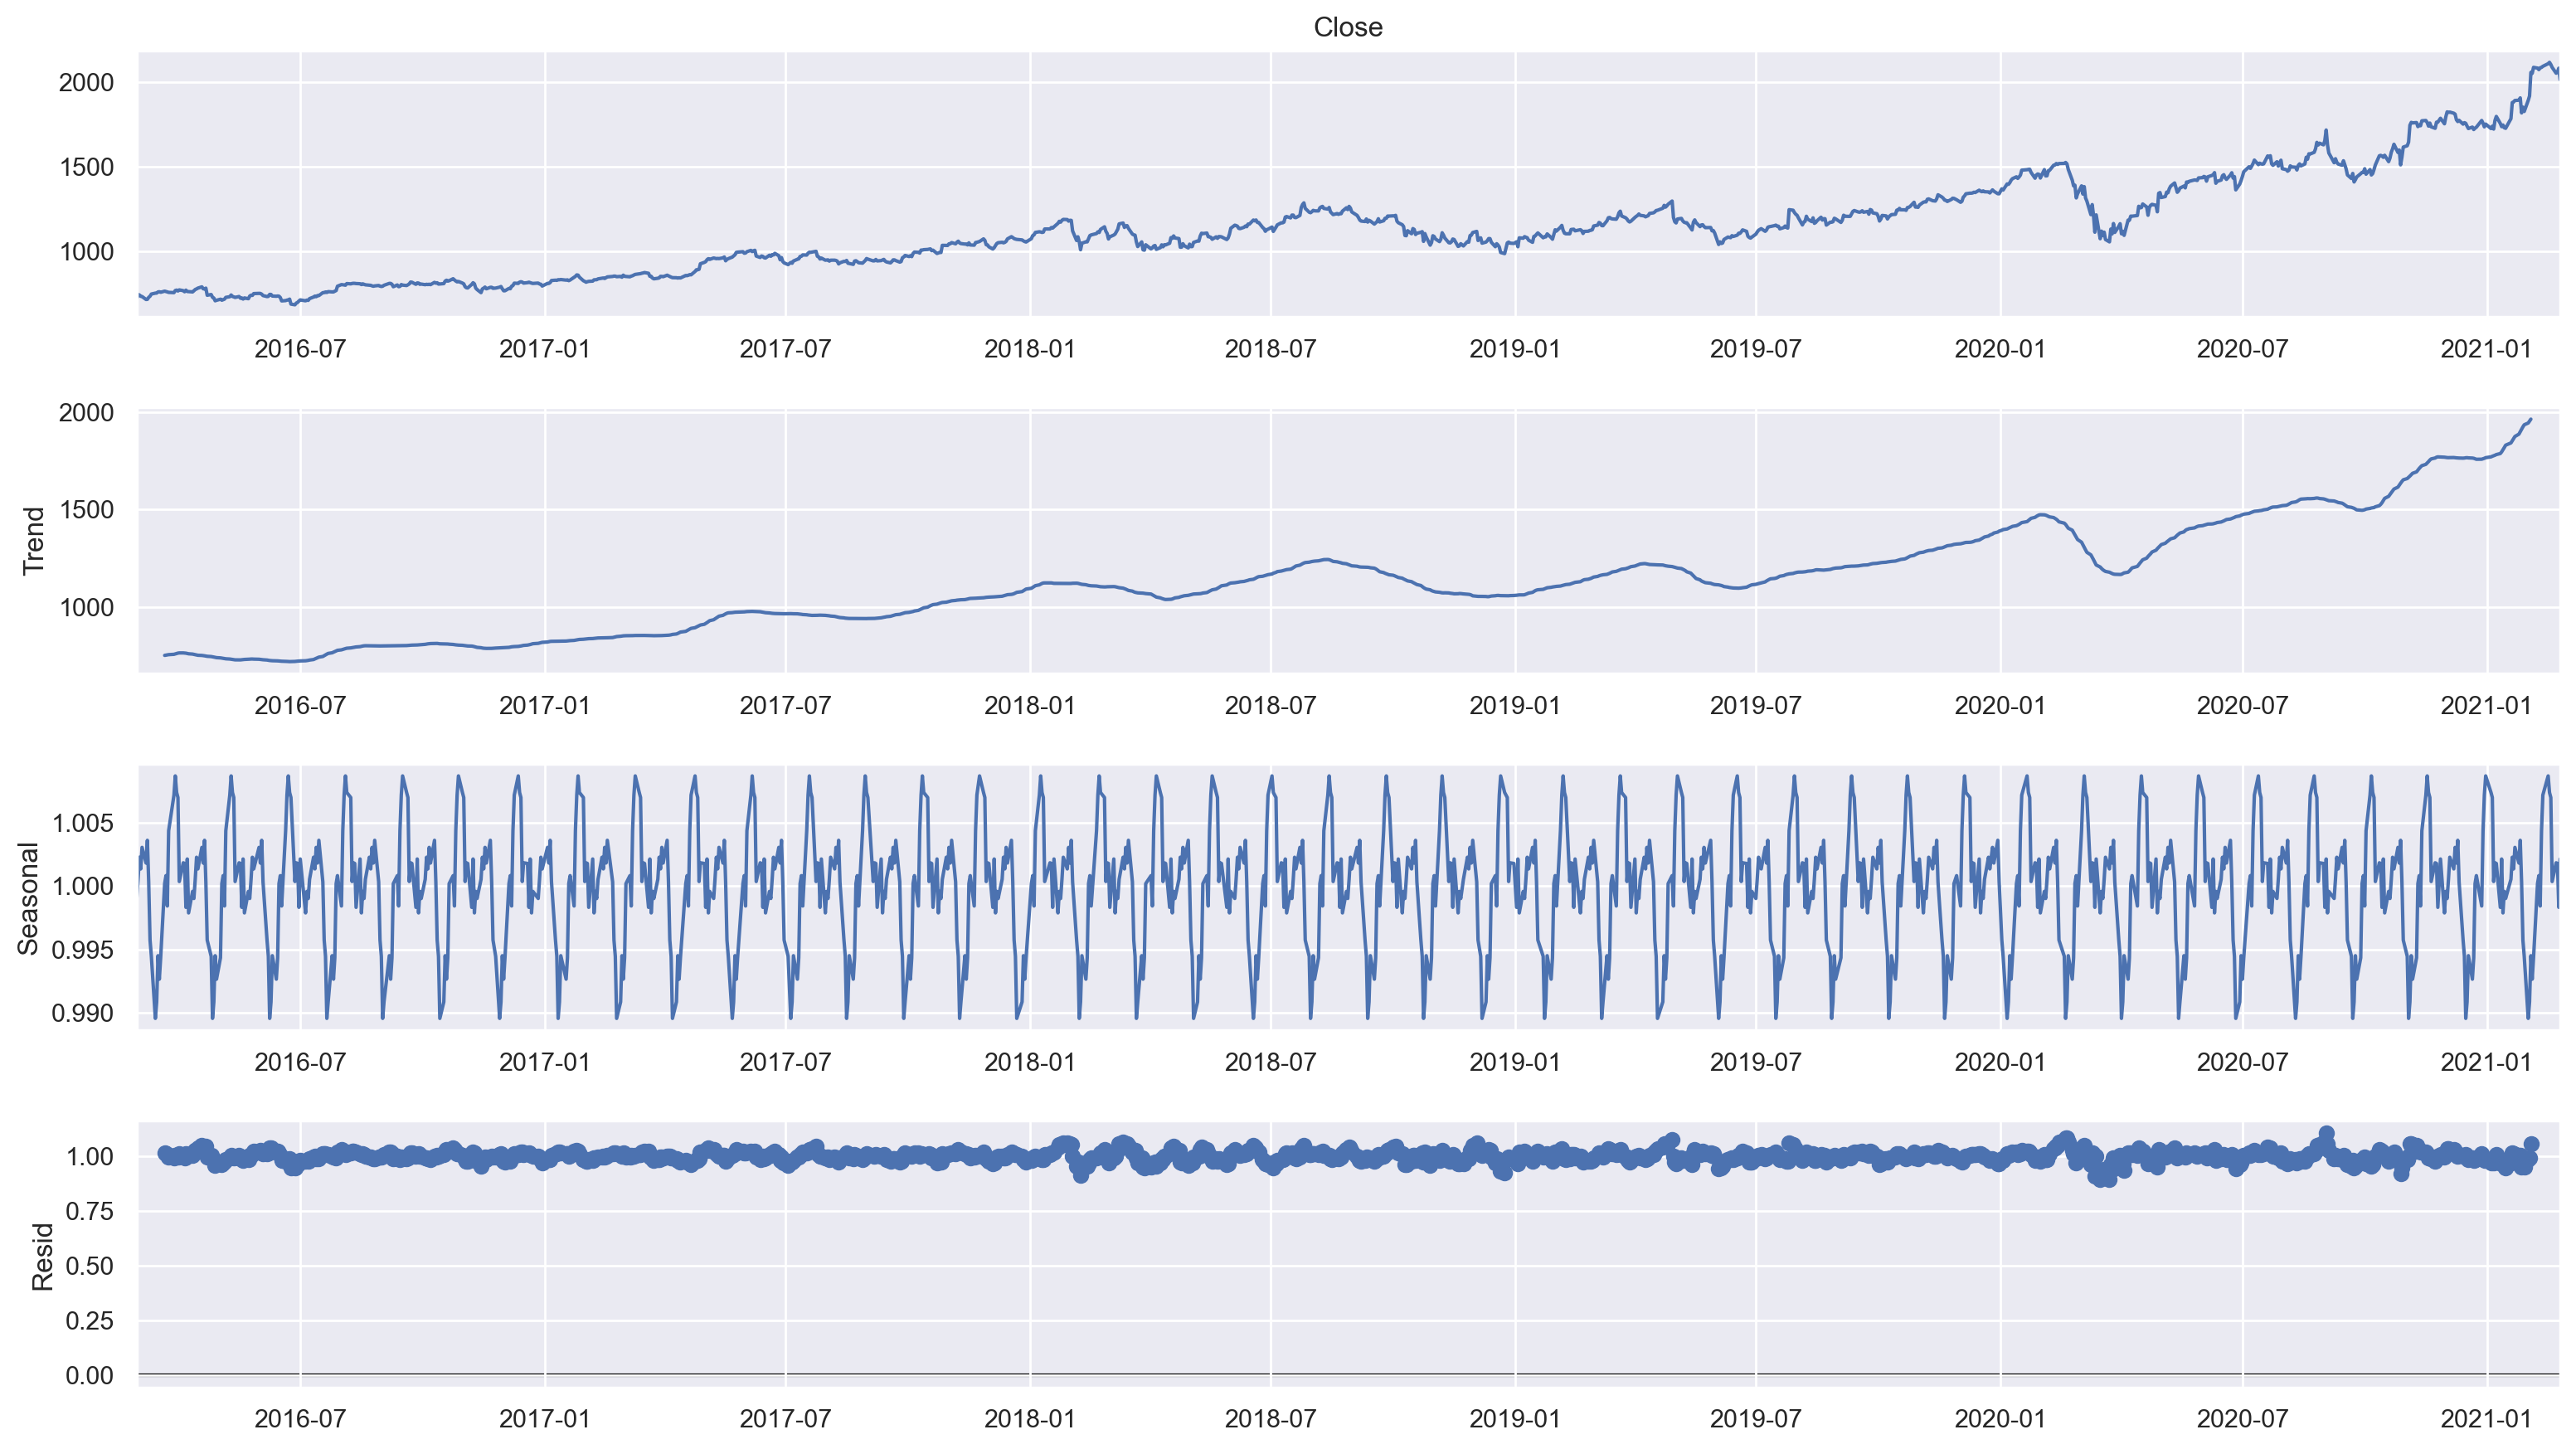

In [9]:
result = seasonal_decompose(data_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


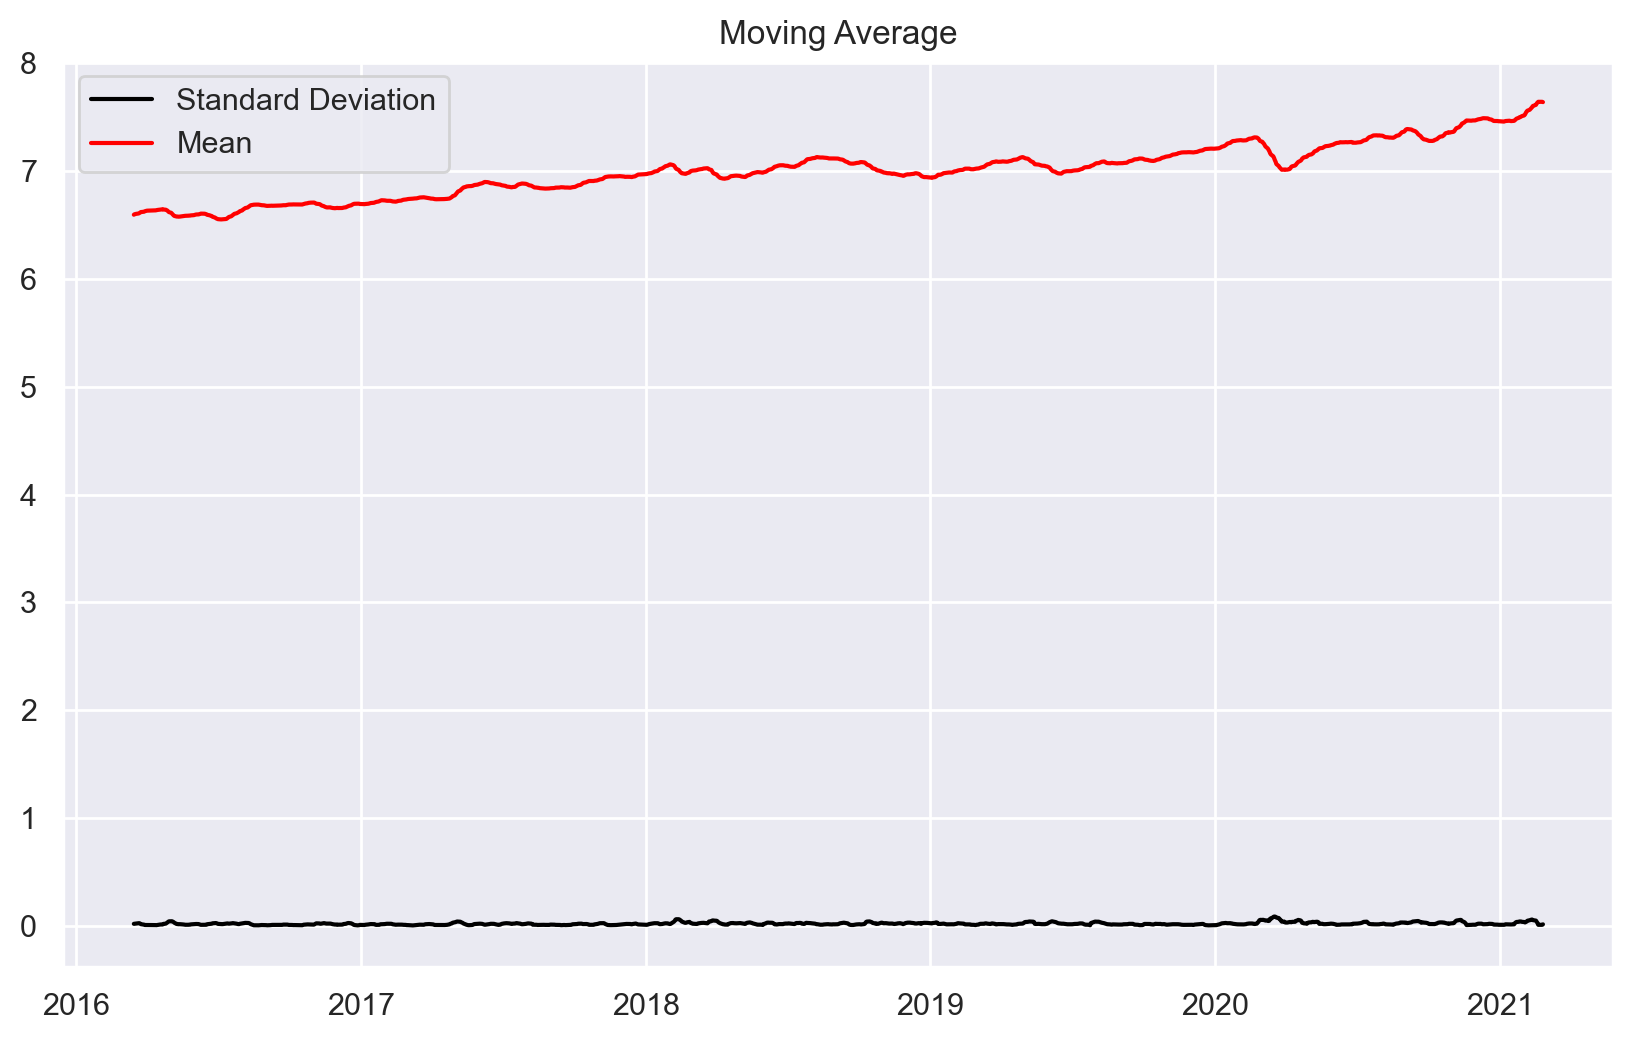

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
data_log = np.log(data['Close'])
moving_avg = data_log.rolling(12).mean()
std_dev = data_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

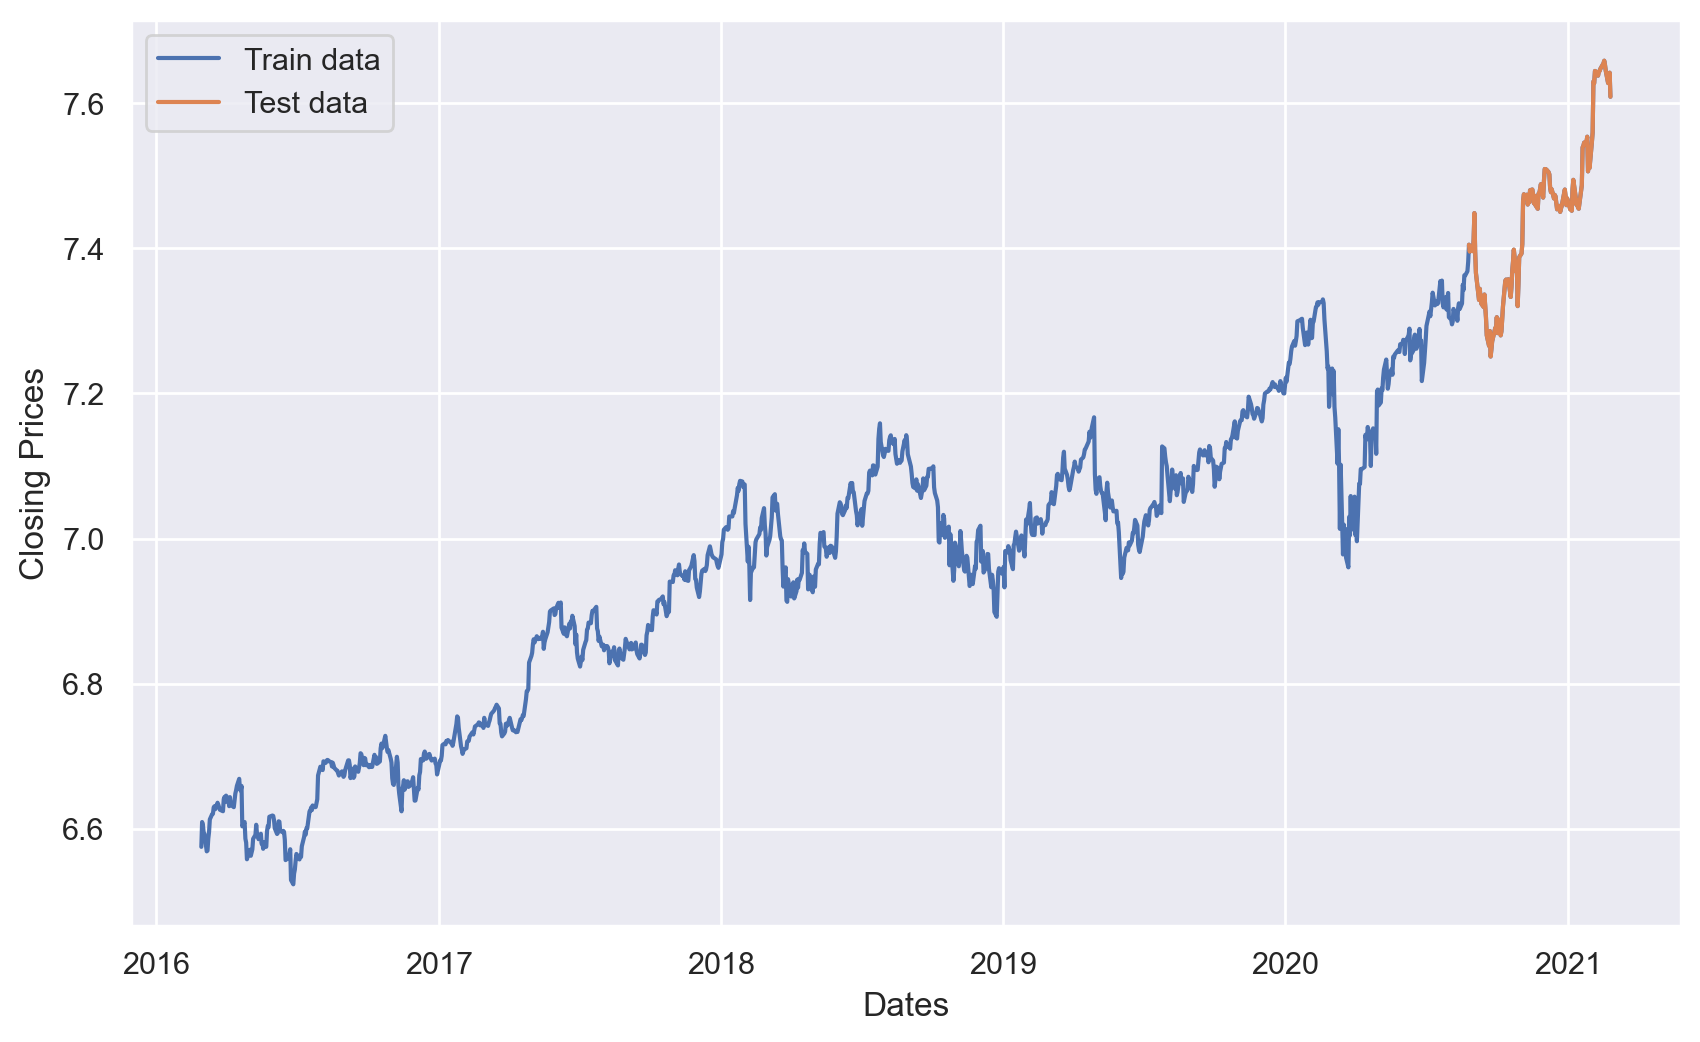

In [11]:
train_data, test_data = data_log[3:int(len(data_log)*0.9)], data_log[int(len(data_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data_log, label='Train data')
plt.plot(test_data, label='Test data')
plt.legend()

In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6073.919, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6096.177, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6095.416, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6073.873, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6094.178, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6094.177, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6092.181, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6095.447, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.693 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1129
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3051.089
Date:                Tue, 02 Mar 2021   AIC                          -6096.177
Time:                       

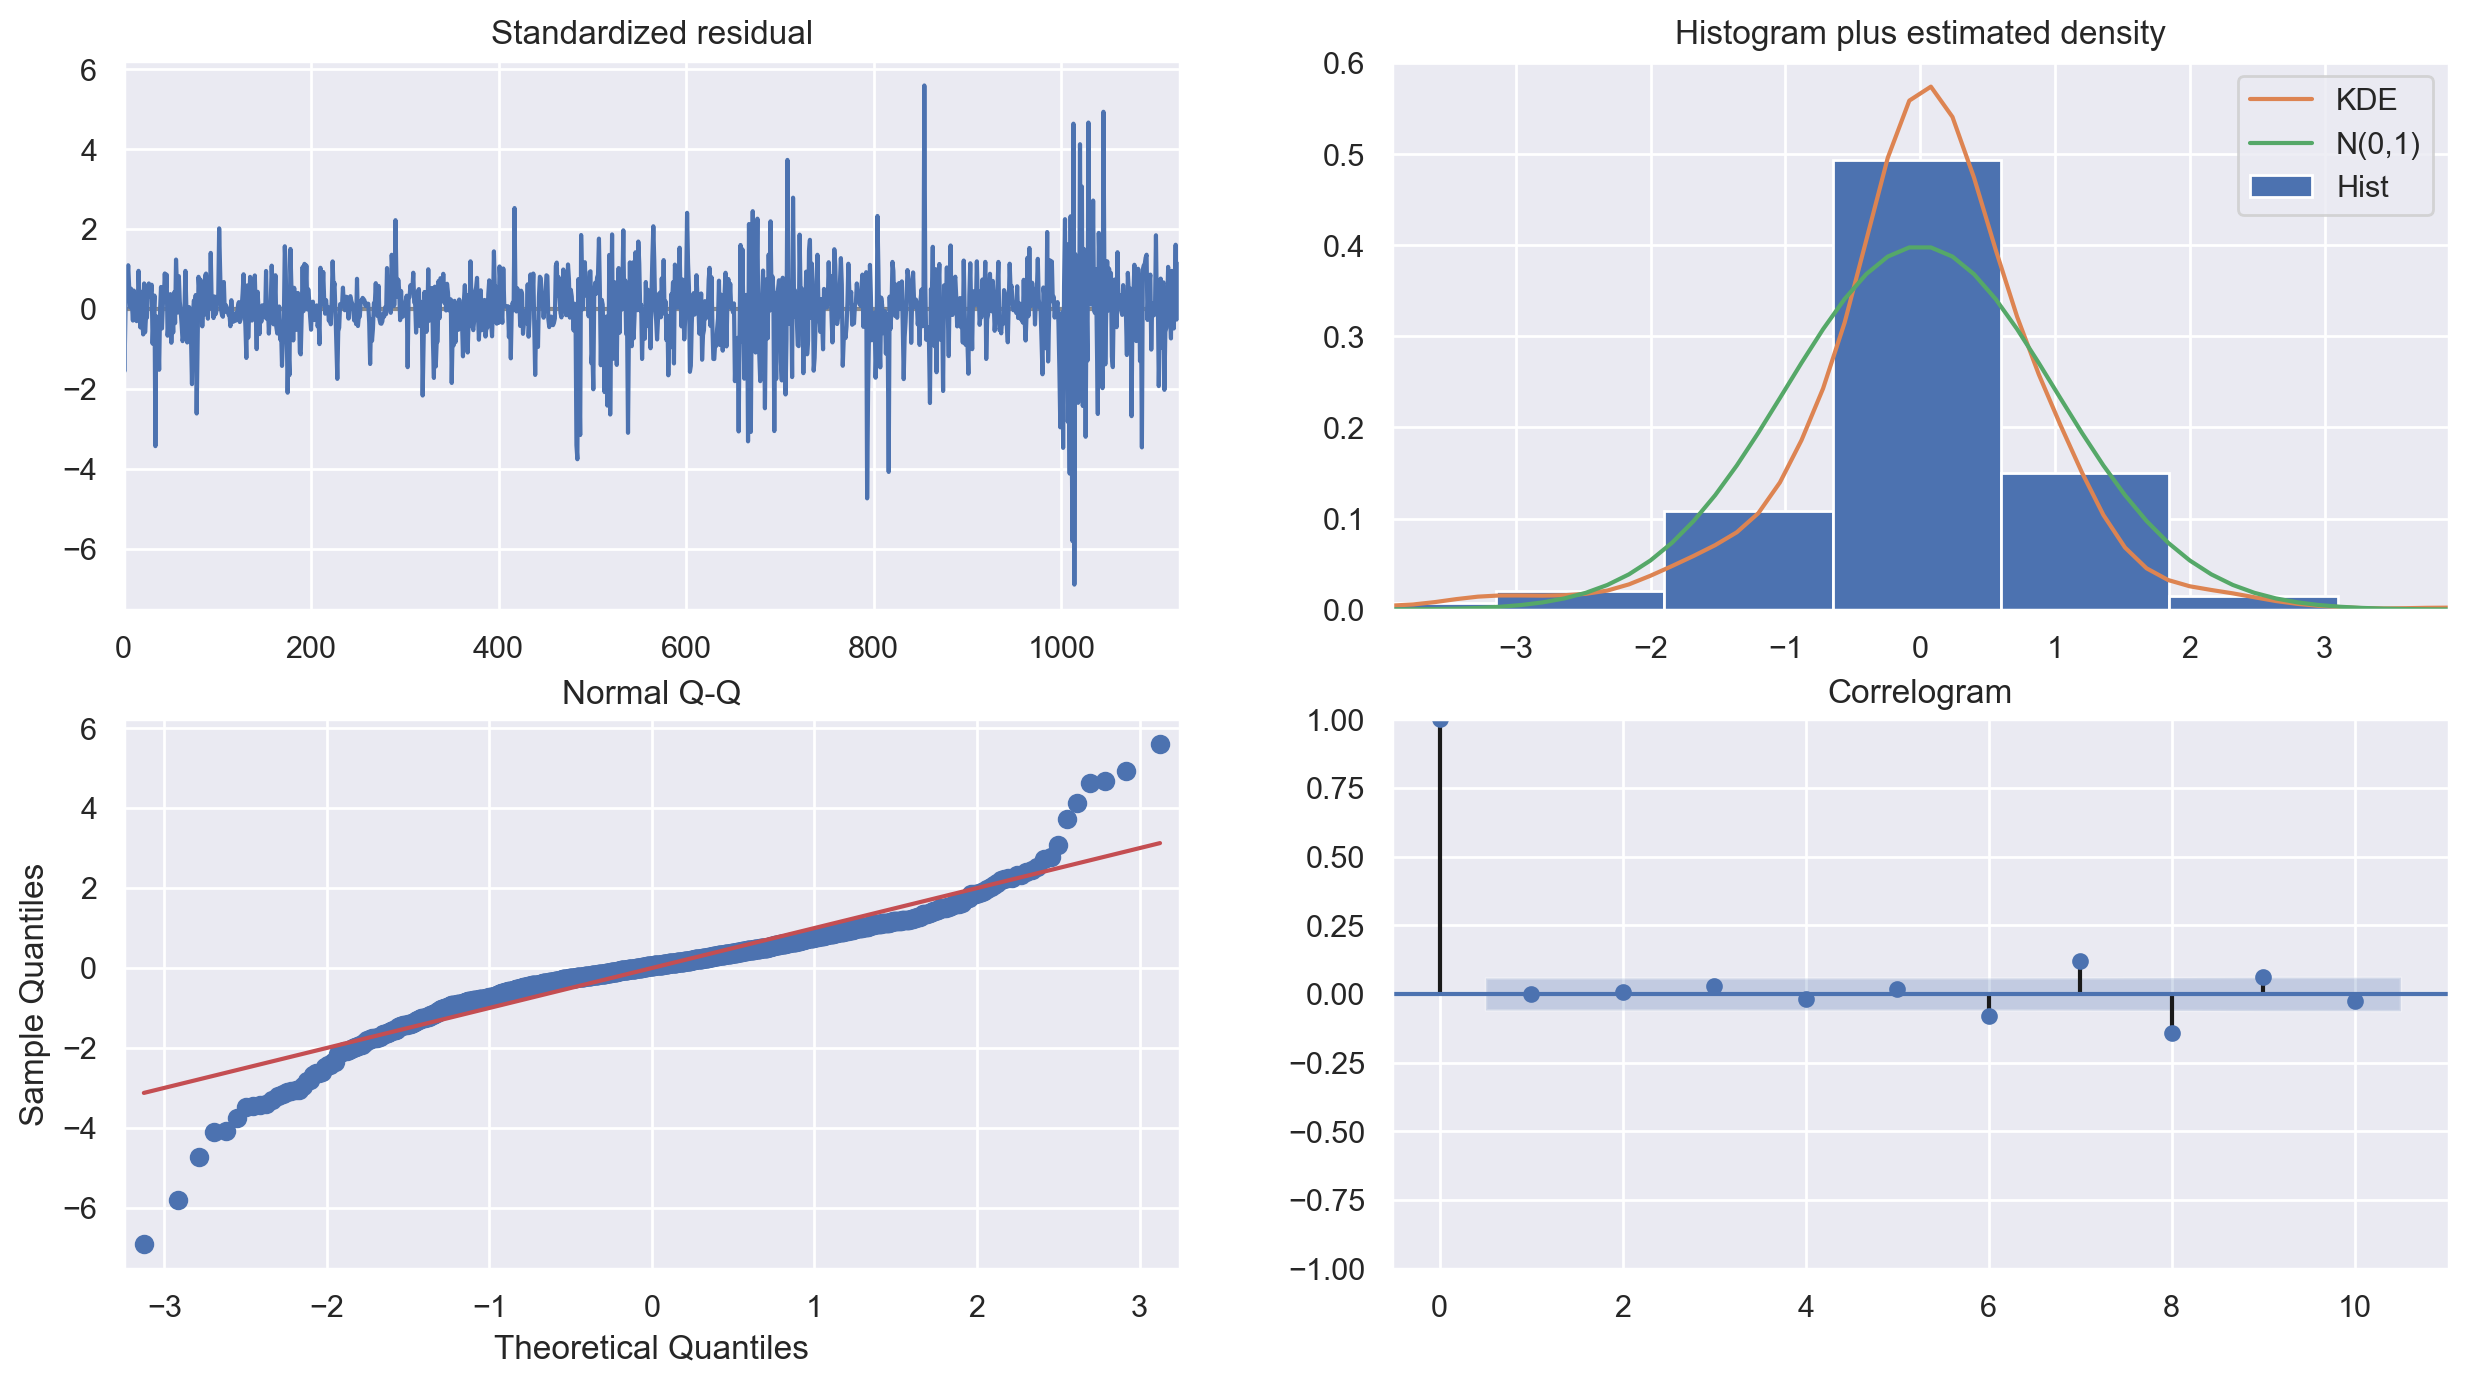

In [14]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [15]:
model = ARIMA(train_data, order=(1, 1, 0))
fitted = model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1128
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3051.089
Method:                       css-mle   S.D. of innovations              0.016
Date:                Tue, 02 Mar 2021   AIC                          -6096.177
Time:                        18:44:15   BIC                          -6081.093
Sample:                             1   HQIC                         -6090.478
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0007      0.000      1.655      0.098      -0.000       0.002
ar.L1.D.Close    -0.1458      0.029     -4.952      0.000      -0.204      -0.088
                                    Root

/home/satyamx/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/satyamx/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [16]:
# Forecast

fc, se, conf = fitted.forecast(126, alpha=0.05)  # 95% confidence


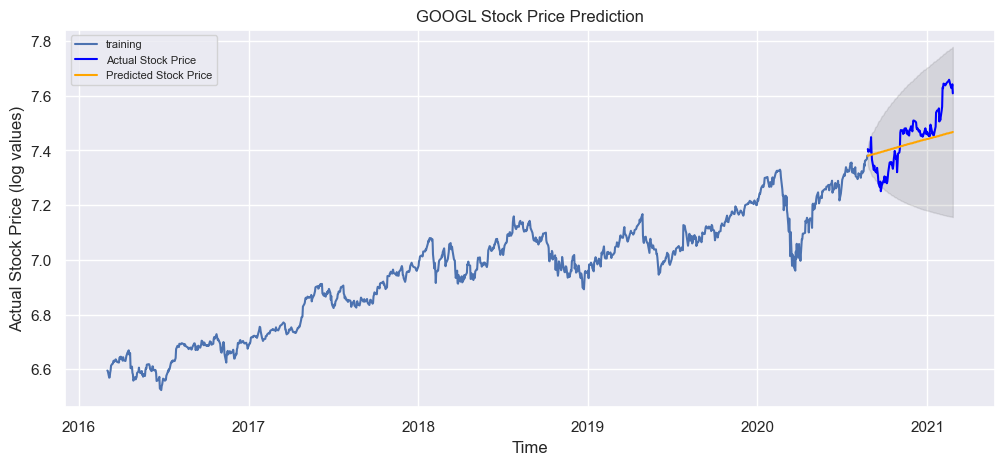

In [17]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('GOOGL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price (log values)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [18]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.007680885353360459
MAE: 0.07123848447313966
RMSE: 0.08764066038866013
MAPE: 0.009531703552503911
